In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Definimos el dataframe a partir del archivo csv que obtuvimos mediante webscrapping:

In [116]:
df_games = pd.read_csv("datos_metacritic.csv")
df_games.head()

,Nombre,Rating_Meta,Rating_Usuarios,Plataforma,Developer,Fecha,Genero,Resumen,N_jugadores,Clasificacion
0,The Legend of Zelda: Ocarina of Time,99,9.1,Nintendo 64,Nintendo,"Nov 23, 1998",Action Adventure,"As a young boy, Link is tricked by Ganondorf, ...",1 Player,E
1,Tony Hawk's Pro Skater 2,98,7.4,PlayStation,Activision,"Sep 20, 2000",Sports,As most major publishers' development efforts ...,1-2,T
2,Grand Theft Auto IV,98,7.8,PlayStation 3,Rockstar Games,"Apr 29, 2008",Action Adventure,[Metacritic's 2008 PS3 Game of the Year; Also ...,1 Player,M
3,SoulCalibur,98,8.4,Dreamcast,Namco,"Sep 8, 1999",Action,"This is a tale of souls and swords, transcendi...",1-2,T
4,Grand Theft Auto IV,98,8.0,Xbox 360,Rockstar Games,"Apr 29, 2008",Action Adventure,[Metacritic's 2008 Xbox 360 Game of the Year; ...,1 Player,M


Vemos los tipos de datos:

In [87]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9942 entries, 0 to 9941
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Nombre           9942 non-null   object
 1   Rating_Meta      9942 non-null   object
 2   Rating_Usuarios  9942 non-null   object
 3   Plataforma       9942 non-null   object
 4   Developer        9942 non-null   object
 5   Fecha            9942 non-null   object
 6   Genero           9942 non-null   object
 7   Resumen          9942 non-null   object
 8   N_jugadores      9936 non-null   object
 9   Clasificacion    9942 non-null   object
dtypes: object(10)
memory usage: 776.8+ KB


Borramos algunos datos inconsistentes

In [117]:
df_games = df_games[df_games["Fecha"]!= "TBA - Early Access"] #eliminamos valor erroneo de fecha
df_games = df_games[df_games["Rating_Meta"]!= 'tbd'] #Valores no utiles en el analisis
df_games = df_games[df_games["Rating_Usuarios"]!= 'tbd']

Cambiamos los datos a tipos de datos correctos para su analisis y manipulacion:

In [118]:
categorias = ["float", "float", "category", "category", "category", "category", "category"]
columnas = ["Rating_Meta", "Rating_Usuarios", "N_jugadores",
            "Clasificacion", "Plataforma", "Genero", "Developer"]

df_games["Fecha"] = pd.to_datetime(df_games["Fecha"])

n = 0
for col in columnas:
    try:
        df_games[col] = df_games[col].astype(categorias[n])  ####Arreglar errores
        n+=1
    except:
        print(col)
        continue

In [90]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9264 entries, 0 to 9941
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Nombre           9264 non-null   object        
 1   Rating_Meta      9264 non-null   float64       
 2   Rating_Usuarios  9264 non-null   float64       
 3   Plataforma       9264 non-null   category      
 4   Developer        9264 non-null   category      
 5   Fecha            9264 non-null   datetime64[ns]
 6   Genero           9264 non-null   category      
 7   Resumen          9264 non-null   object        
 8   N_jugadores      9258 non-null   category      
 9   Clasificacion    9264 non-null   category      
dtypes: category(5), datetime64[ns](1), float64(2), object(2)
memory usage: 537.0+ KB


Ahora los datos estan en un formato correcto para su manipulación

In [91]:
df_games.head()

,Nombre,Rating_Meta,Rating_Usuarios,Plataforma,Developer,Fecha,Genero,Resumen,N_jugadores,Clasificacion
0,The Legend of Zelda: Ocarina of Time,99.0,9.1,Nintendo 64,Nintendo,1998-11-23,Action Adventure,"As a young boy, Link is tricked by Ganondorf, ...",1 Player,E
1,Tony Hawk's Pro Skater 2,98.0,7.4,PlayStation,Activision,2000-09-20,Sports,As most major publishers' development efforts ...,1-2,T
2,Grand Theft Auto IV,98.0,7.8,PlayStation 3,Rockstar Games,2008-04-29,Action Adventure,[Metacritic's 2008 PS3 Game of the Year; Also ...,1 Player,M
3,SoulCalibur,98.0,8.4,Dreamcast,Namco,1999-09-08,Action,"This is a tale of souls and swords, transcendi...",1-2,T
4,Grand Theft Auto IV,98.0,8.0,Xbox 360,Rockstar Games,2008-04-29,Action Adventure,[Metacritic's 2008 Xbox 360 Game of the Year; ...,1 Player,M


A efectos de igualar la escala de rating entre "Rating_Meta y "Rating_usuarios" dividiremos "Rating_Meta" por 10

In [119]:
df_games["Rating_Meta"] = df_games["Rating_Meta"] / 10
df_games

,Nombre,Rating_Meta,Rating_Usuarios,Plataforma,Developer,Fecha,Genero,Resumen,N_jugadores,Clasificacion
0,The Legend of Zelda: Ocarina of Time,9.9,9.1,Nintendo 64,Nintendo,1998-11-23,Action Adventure,"As a young boy, Link is tricked by Ganondorf, ...",1 Player,E
1,Tony Hawk's Pro Skater 2,9.8,7.4,PlayStation,Activision,2000-09-20,Sports,As most major publishers' development efforts ...,1-2,T
2,Grand Theft Auto IV,9.8,7.8,PlayStation 3,Rockstar Games,2008-04-29,Action Adventure,[Metacritic's 2008 PS3 Game of the Year; Also ...,1 Player,M
3,SoulCalibur,9.8,8.4,Dreamcast,Namco,1999-09-08,Action,"This is a tale of souls and swords, transcendi...",1-2,T
4,Grand Theft Auto IV,9.8,8.0,Xbox 360,Rockstar Games,2008-04-29,Action Adventure,[Metacritic's 2008 Xbox 360 Game of the Year; ...,1 Player,M
...,...,...,...,...,...,...,...,...,...,...
9937,Vroom in the Night Sky,1.7,3.2,Switch,Poisoft,2017-04-05,Sports,Vroom in the night sky is a magical bike actio...,No Online Multiplayer,E
9938,Leisure Suit Larry: Box Office Bust,1.7,1.9,PlayStation 3,Funsta,2009-05-05,Action Adventure,The Leisure Suit Larry: Box Office Bust video ...,No Online Multiplayer,M
9939,Yaris,1.7,4.4,Xbox 360,Backbone Entertainment,2007-10-10,Driving,[Xbox Live Arcade] Hop into a Toyota Yaris an...,2 Online,E10+
9940,Ride to Hell: Retribution,1.6,1.4,PC,Deep Silver,2013-06-24,Driving,The game is set in the last years of the roari...,2 Online,M


¿Como se diferencia el rating de criticos al rating dado por los usuarios?**

<AxesSubplot:ylabel='Rating_Meta'>

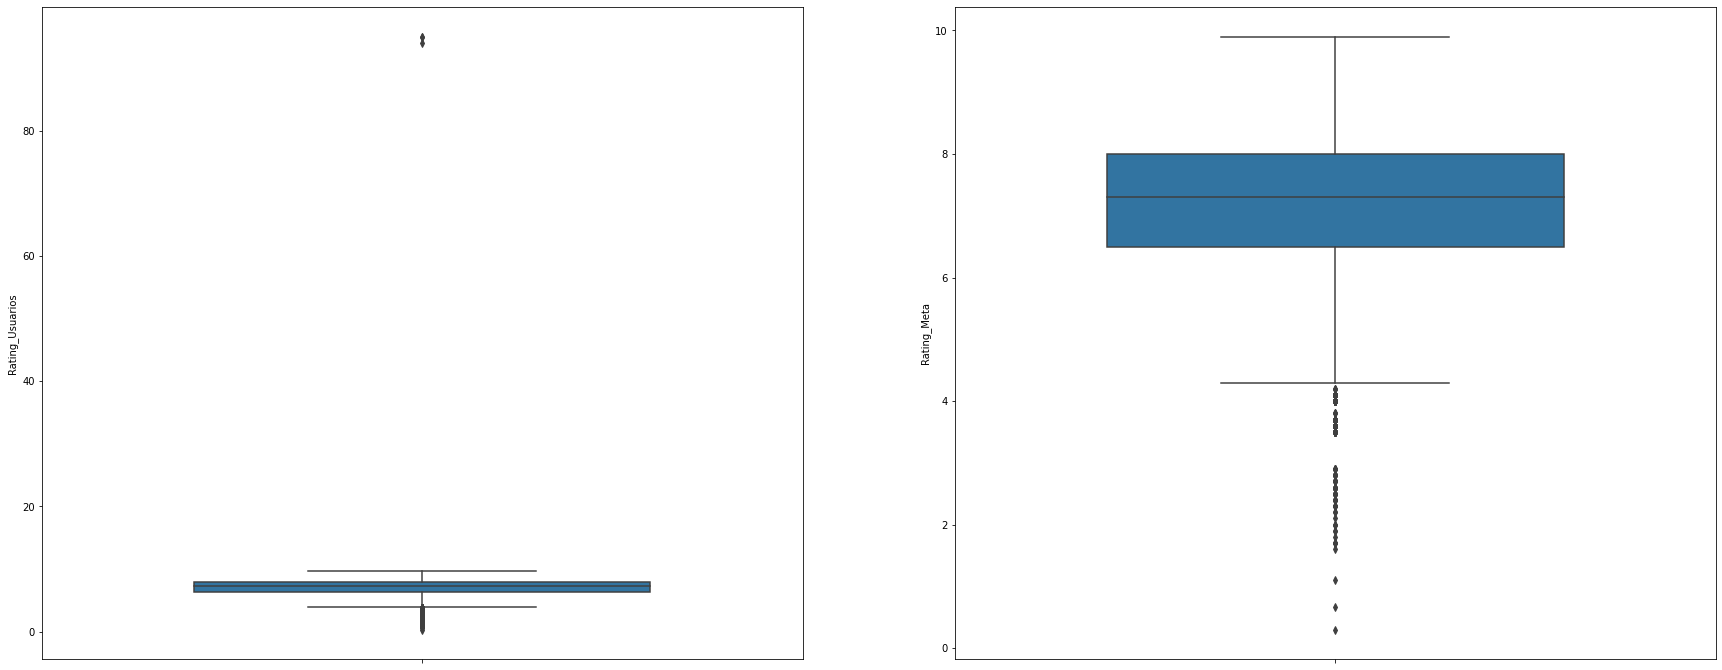

In [93]:
fig, (ax, ax2) = plt.subplots(1,2, figsize=(30,12))

sns.boxplot(data=df_games,y='Rating_Usuarios', width=0.6, ax=ax)
sns.boxplot(data=df_games,y='Rating_Meta', width=0.6, ax=ax2)

Hay valores muy grandes para tener sentido en "Rating_usuarios" (max calificacion usuarios = 10)
filtramos:

In [120]:
df_games = df_games[df_games["Rating_Usuarios"] <= 10]

<AxesSubplot:ylabel='Rating_Meta'>

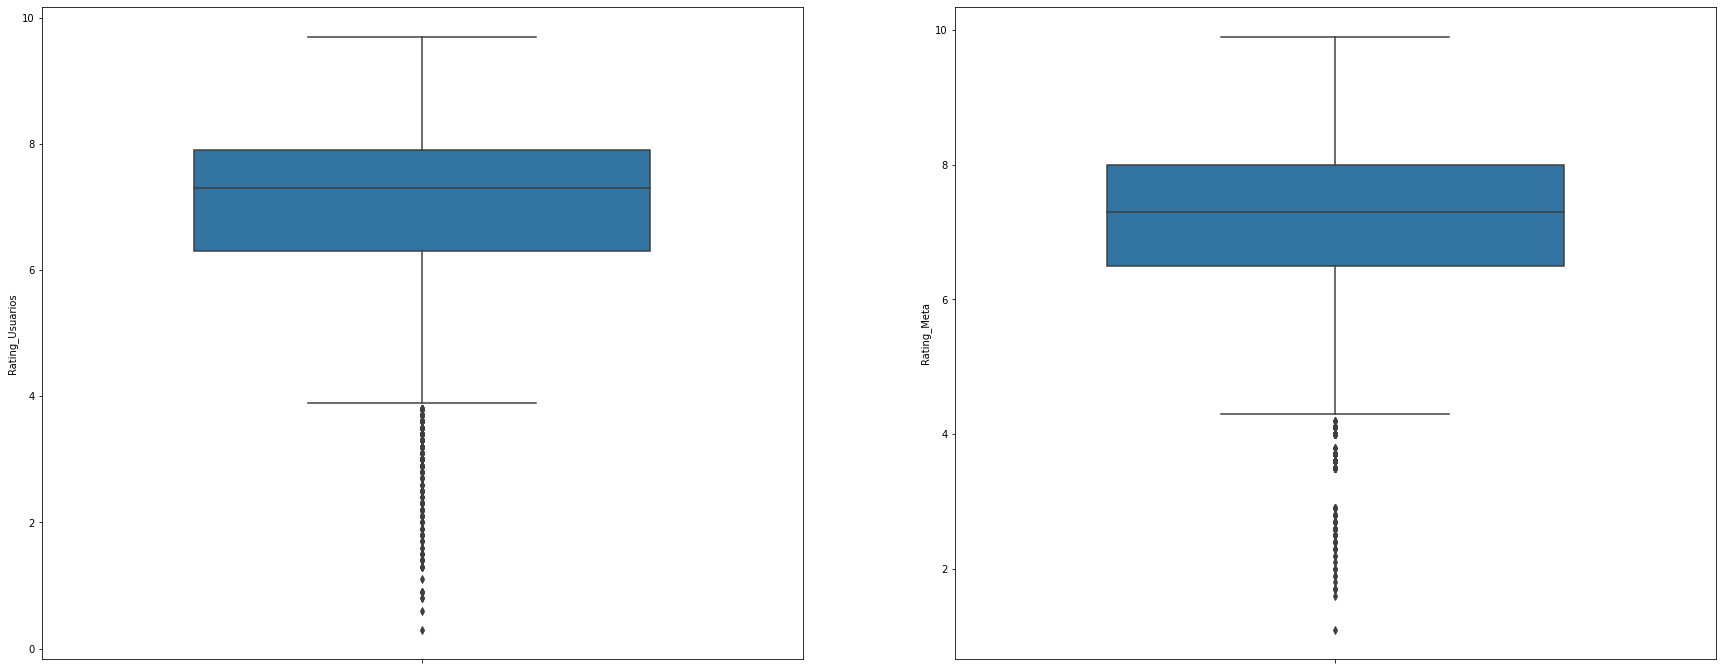

In [95]:
fig, (ax, ax2) = plt.subplots(1,2, figsize=(30,12))

sns.boxplot(data=df_games,y='Rating_Usuarios', width=0.6, ax=ax)
sns.boxplot(data=df_games,y='Rating_Meta', width=0.6, ax=ax2)

RATINGS POR GENERO

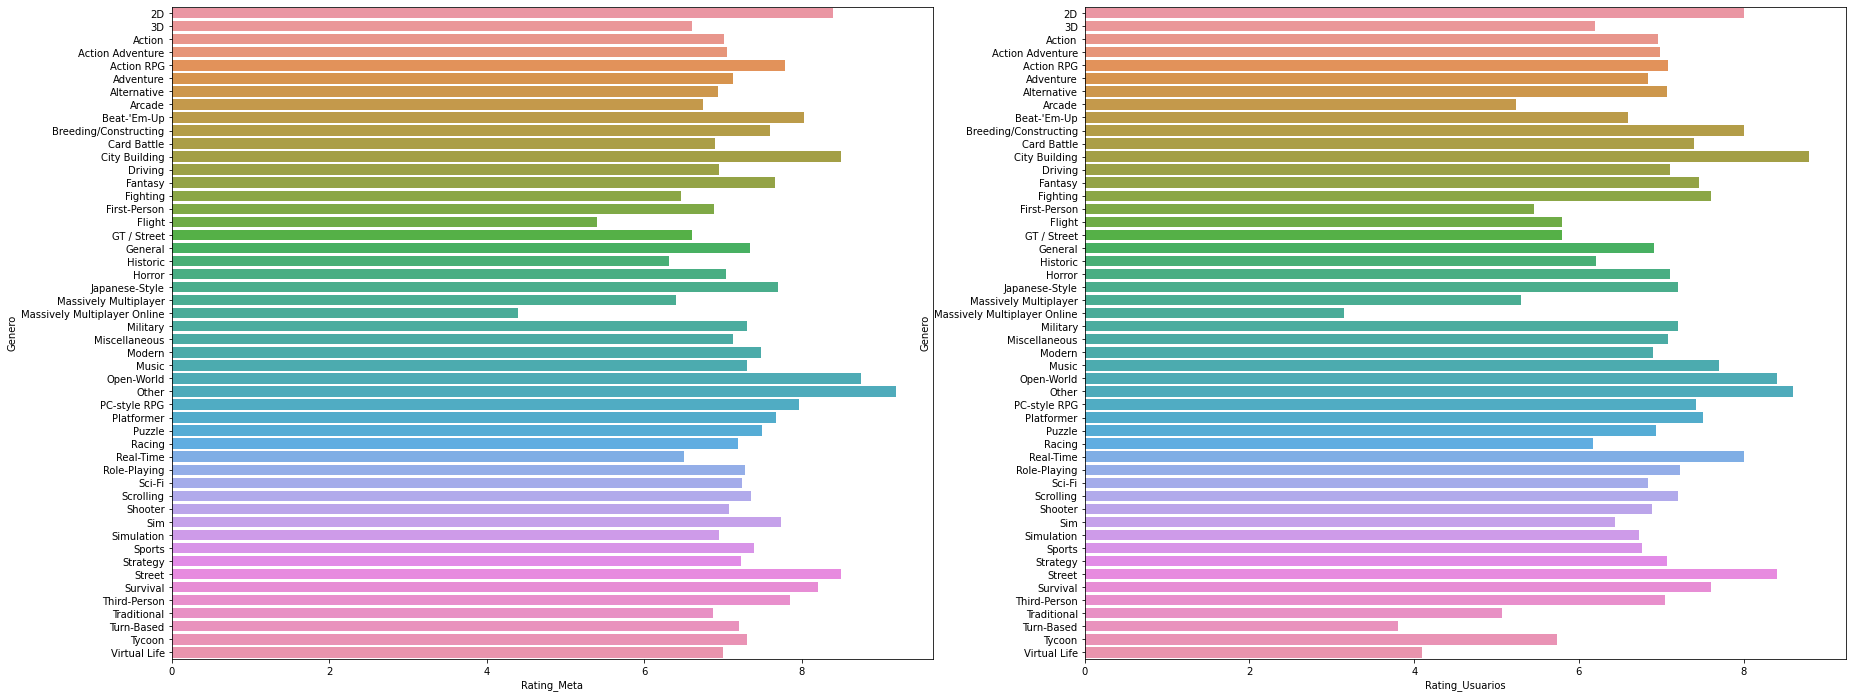

,Genero,Rating_Meta,Rating_Usuarios
0,2D,8.400000,8.000000
1,3D,6.600000,6.200000
2,Action,7.013485,6.961589
3,Action Adventure,7.051645,6.985115
4,Action RPG,7.786667,7.086667


In [96]:
rank_genero = df_games.groupby(by="Genero", as_index=False).agg({"Rating_Meta":"mean", "Rating_Usuarios": "mean"})
fig, (ax, ax2) = plt.subplots(1,2, figsize=(30,12))
sns.barplot(x="Rating_Meta", y="Genero", data=rank_genero, ax=ax)
sns.barplot(x="Rating_Usuarios", y="Genero", data=rank_genero, ax=ax2)
plt.show()
rank_genero.head()

In [97]:
df_games.head()

,Nombre,Rating_Meta,Rating_Usuarios,Plataforma,Developer,Fecha,Genero,Resumen,N_jugadores,Clasificacion
0,The Legend of Zelda: Ocarina of Time,9.9,9.1,Nintendo 64,Nintendo,1998-11-23,Action Adventure,"As a young boy, Link is tricked by Ganondorf, ...",1 Player,E
1,Tony Hawk's Pro Skater 2,9.8,7.4,PlayStation,Activision,2000-09-20,Sports,As most major publishers' development efforts ...,1-2,T
2,Grand Theft Auto IV,9.8,7.8,PlayStation 3,Rockstar Games,2008-04-29,Action Adventure,[Metacritic's 2008 PS3 Game of the Year; Also ...,1 Player,M
3,SoulCalibur,9.8,8.4,Dreamcast,Namco,1999-09-08,Action,"This is a tale of souls and swords, transcendi...",1-2,T
4,Grand Theft Auto IV,9.8,8.0,Xbox 360,Rockstar Games,2008-04-29,Action Adventure,[Metacritic's 2008 Xbox 360 Game of the Year; ...,1 Player,M


Hacemos una macroclasificacion de los generos:

In [123]:
for a in df_games["Genero"].unique():
    print(a)

Action
Sports
Modern
Role-Playing
Fantasy
Miscellaneous
Adventure
Driving
Puzzle
Open-World
Strategy
Simulation
Racing
Action RPG
Other
General
Platformer
Shooter
Beat-'Em-Up
Horror
Sim
Sci-Fi
Japanese-Style
First-Person
City Building
PC-style RPG
Street
Traditional
2D
Arcade
Survival
Third-Person
Scrolling
Turn-Based
Historic
Tycoon
Breeding/Constructing
Alternative
Military
Music
GT / Street
Fighting
Virtual Life
Card Battle
Massively Multiplayer Online
3D
Real-Time
Massively Multiplayer
Flight


In [122]:
df_games.replace({"Action Adventure", "Adventure", "Action RPG"},"Action" ,inplace=True)
df_games.replace({"Simulation"},"Other" ,inplace=True)
df_games.replace({"Action Adventure", "Driving"},"Sport" ,inplace=True)
df_games.replace({"Action Adventure", "Modern", "Role-Playing"},"Other" ,inplace=True)
df_games.replace({"Fantasy", "Puzzle"},"Strategy" ,inplace=True)
df_games.replace({"Open-World", ""},"Adventure" ,inplace=True)

C:\Users\56931\AppData\Local\Temp\ipykernel_16084\421425391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games.replace({"Action Adventure"},"Action" ,inplace=True)


In [104]:
columns = ["Plataforma", "Developer", "Genero", "N_jugadores", "Clasificacion"]
for c in columns:
    df_games[c] = df_games[c].cat.codes
df_games

C:\Users\56931\AppData\Local\Temp\ipykernel_16084\1062857496.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games[c] = df_games[c].cat.codes


,Nombre,Rating_Meta,Rating_Usuarios,Plataforma,Developer,Fecha,Genero,Resumen,N_jugadores,Clasificacion
0,The Legend of Zelda: Ocarina of Time,9.9,9.1,5,750,1998-11-23,2,"As a young boy, Link is tricked by Ganondorf, ...",0,1
1,Tony Hawk's Pro Skater 2,9.8,7.4,8,36,2000-09-20,40,As most major publishers' development efforts ...,4,6
2,Grand Theft Auto IV,9.8,7.8,10,940,2008-04-29,2,[Metacritic's 2008 PS3 Game of the Year; Also ...,0,4
3,SoulCalibur,9.8,8.4,2,727,1999-09-08,2,"This is a tale of souls and swords, transcendi...",4,6
4,Grand Theft Auto IV,9.8,8.0,19,940,2008-04-29,2,[Metacritic's 2008 Xbox 360 Game of the Year; ...,0,4
...,...,...,...,...,...,...,...,...,...,...
9937,Vroom in the Night Sky,1.7,3.2,15,859,2017-04-05,40,Vroom in the night sky is a magical bike actio...,30,1
9938,Leisure Suit Larry: Box Office Bust,1.7,1.9,10,404,2009-05-05,2,The Leisure Suit Larry: Box Office Bust video ...,30,4
9939,Yaris,1.7,4.4,19,95,2007-10-10,11,[Xbox Live Arcade] Hop into a Toyota Yaris an...,18,2
9940,Ride to Hell: Retribution,1.6,1.4,6,266,2013-06-24,11,The game is set in the last years of the roari...,18,4


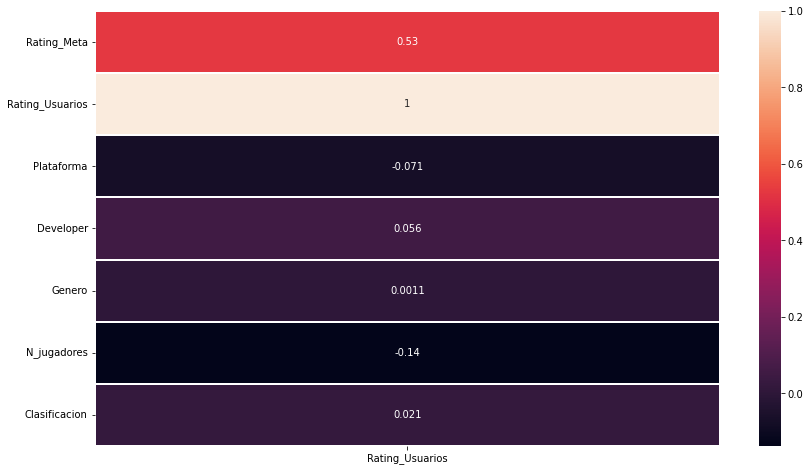

In [83]:
fig,  ax = plt.subplots(1, 1, figsize=(14, 8))
sns.heatmap(df_games.corr()[["Rating_Usuarios"]], annot=True, linewidths=0.05, ax=ax)
plt.show()